# Linear Regression

- y=a + bx + b1 x1 + b2 x2.........
- y => dependent/target (1) [1D]
- x => independent/features (n) [2D]

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
#independent
time = np.array([5,7,12,16,20]).reshape(-1,1)

In [22]:
#dependent
mass = np.array([40,120,180,210,240])

In [24]:
mymodel = LinearRegression()
#model.fit(independent,dependent)
mymodel.fit(time,mass)

LinearRegression()

In [26]:
x = int(input("Enter the time in minutes :"))
result = mymodel.predict([[x]])  #passsing independent variable(time in 2D)
print("If the time is ",x,"minutes the mass is ",result[0], " grams")

Enter the time in minutes : 13


If the time is  13 minutes the mass is  170.2077922077922  grams


In [27]:
mass_model = mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


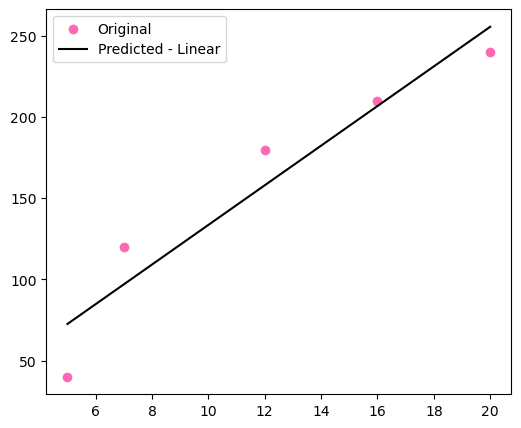

In [30]:
#plotting original values - scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass,label="Original",color="hotpink")
#plotting mode valuea - Line
plt.plot(time,mass_model,label="Predicted - Linear",color='k')
plt.legend()
plt.show()

Evalution

R-Square
 - Larger is better.

In [33]:
r2score=r2_score(time,mass_model)
print(r2score)

-816.6925282509699


Mean Squared Error [MSE]
- Lower is better.

In [35]:
mse=mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


Mean Abosulte Error
- Lower is better.

In [36]:
mas=mean_absolute_error(time,mass_model)
print(mas)

146.0


Linear Regresssion on Large Data

Case : Predicting the salary from age,experience,gender,education

1.Import libraries
2.Load Data
3.Split Data
4.Create and Train Model
5. Test the model
6.Evalution

1.Importing Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2.Data Loading

In [64]:
data=pd.read_csv(r"C:\My python Files\Salary_EDA.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


Clean Data

In [66]:
data.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

Data Preprocessing

In [67]:
data.dropna(inplace=True)

In [68]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

 Encode the Data

In [69]:
le=LabelEncoder()
data['Gender_Encoded']=le.fit_transform(data['Gender'])
le1=LabelEncoder()
data['Edu_Level_Encoded']=le1.fit_transform(data['Education Level'])

In [70]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encoded,Edu_Level_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


3.Split Data

Split - independent , Dependent

In [71]:
X = data[['Age','Gender_Encoded','Edu_Level_Encoded','Years of Experience']]
Y = data['Salary']

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
#total 700 records
#X_train- 560(age,gender,Education,experience)
#X_test- 140(age,gender,Eduction,experience)
#Y_train- 560(Salary)
#Y_test- 140(Salary)

4.Create and train Model

In [74]:
sal_model=LinearRegression()
sal_model.fit(X_train,Y_train)

LinearRegression()

5. Test

In [81]:
a=float(input("Enter your age: "))
g_user=input("Enter your Gender: ")
ed_user=input("Enter your Education level: ")
Exp=float(input("Enter your experience in year: "))

Enter your age:  32
Enter your Gender:  Male
Enter your Education level:  PhD
Enter your experience in year:  7


In [82]:
gen_en=le.transform([g_user])[0]
edu_en=le1.transform([ed_user])[0]
print(gen_en,edu_en)

1 2


In [83]:
result = sal_model.predict([[a,gen_en,edu_en,Exp]])
print("The predicted Salary is: ",result[0])

The predicted Salary is:  98872.0492018653


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.Evalution
 1.Predict test values
 2.Visualize
 3.Metrices

In [90]:
model_prediction=sal_model.predict(X_test)

2.Vistualize

In [91]:
len(Y_test)

74

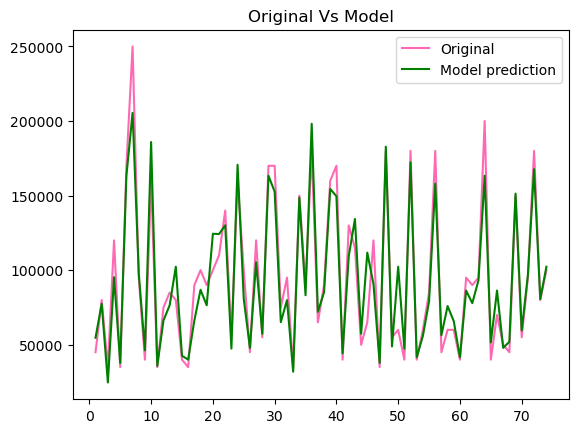

In [93]:
plt.plot(np.arange(1,75),Y_test,color='hotpink',label="Original")
plt.plot(np.arange(1,75),model_prediction,color="green",label="Model prediction")
plt.title("Original Vs Model")
plt.legend()
plt.show()

3.Metrices

In [96]:
r2score=r2_score(Y_test,model_prediction)
print(r2score)
if r2score>0.5:
    print("Model is good fit")
else:
    print("Model is not good fit")

0.908465830252362
Model is good fit


In [98]:
mae=mean_absolute_error(Y_test,model_prediction)
print(mae)

11362.212304880708


In [99]:
mse=mean_squared_error(Y_test,model_prediction)
print(mse)

235720545.72027326
